In [ ]:
#import json
#import requests

In [ ]:
#requisicao = requests.get('https://economia.awesomeapi.com.br/USD-BRL/10?start_date=20200201&end_date=20200229')

In [ ]:
#requisicao
#cotacao = requisicao.json()
#print(cotacao['bid'])

**Coleta de dados utilizando API do Yahoo finanças**

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
import numpy as np
import pandas as pd # Para evitar escrever pandas e trocar pela escrita apenas de pd para facilitar
import pandas_datareader.data as web # Evita a escrita do data e troca pelo web
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

In [ ]:
yf.pdr_override()

In [ ]:
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2023, 3, 2)

In [ ]:
via = web.get_data_yahoo('VIIA3.SA',start,end)
mglu = web.get_data_yahoo('MGLU3.SA',start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
via.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,11.33,11.76,11.23,11.73,11.73,40413200
2020-01-03,11.47,12.00,11.47,11.48,11.48,59501300
2020-01-06,11.45,11.68,11.20,11.48,11.48,35252200
2020-01-07,11.50,11.65,11.42,11.65,11.65,28061600
2020-01-08,11.61,11.83,11.45,11.60,11.60,31668200


In [ ]:
via = via.drop(columns=['Open','High','Low','Adj Close','Volume'])
via.head()

,Close
Date,
2020-01-02,11.73
2020-01-03,11.48
2020-01-06,11.48
2020-01-07,11.65
2020-01-08,11.60


In [ ]:
mglu = mglu.drop(columns=['Open','High','Low','Adj Close','Volume'])
mglu.head()

,Close
Date,
2020-01-02,12.3325
2020-01-03,12.2225
2020-01-06,12.2325
2020-01-07,12.1975
2020-01-08,12.5725


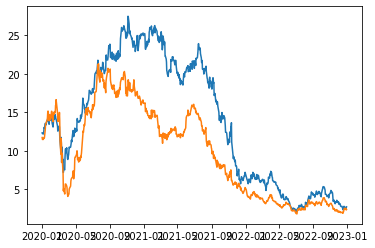

In [ ]:
#plt.figure(figsize=(16, 9))
plt.plot(mglu['Close'])
plt.plot(via['Close'])
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Importar dados
df = web.get_data_yahoo('VIIA3.SA')

# Pré-processamento de dados
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
X = []
y = []
for i in range(60, len(data_scaled)):
    X.append(data_scaled[i-60:i, 0])
    y.append(data_scaled[i, 0])
X = np.array(X)
y = np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Construir o modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units=50, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(X, y, epochs=50, batch_size=32)

# Fazer previsões
last_60_days = data_scaled[-60:]
last_60_days = np.reshape(last_60_days, (1, 60, 1))
predicted_price = model.predict(last_60_days)
predicted_price = scaler.inverse_transform(predicted_price)
print("Preço previsto para amanhã:", predicted_price)

[*********************100%***********************]  1 of 1 completed
Epoch 1/50
181/181 [==============================] - 31s 126ms/step - loss: 0.0034
Epoch 2/50
181/181 [==============================] - 22s 124ms/step - loss: 0.0013
Epoch 3/50
181/181 [==============================] - 23s 126ms/step - loss: 0.0013
Epoch 4/50
181/181 [==============================] - 22s 121ms/step - loss: 0.0010
Epoch 5/50
181/181 [==============================] - 22s 122ms/step - loss: 9.5870e-04
Epoch 6/50
181/181 [==============================] - 21s 118ms/step - loss: 9.1272e-04
Epoch 7/50
181/181 [==============================] - 21s 118ms/step - loss: 7.7315e-04
Epoch 8/50
181/181 [==============================] - 22s 121ms/step - loss: 7.2871e-04
Epoch 9/50
181/181 [==============================] - 23s 129ms/step - loss: 6.8381e-04
Epoch 10/50
181/181 [==============================] - 21s 116ms/step - loss: 6.6977e-04
Epoch 11/50
181/181 [==============================] - 22s 121ms/s